**⚠️ This notebook was automatically generated using dandi-notebook-gen and has not been fully verified. Please exercise caution when interpreting results or code.**

# Exploration of DANDI:001333 - Parkinson's Electrophysiological Signal Dataset (PESD)

**Description:**

The dataset contains electrophysiological signals from both healthy and parkinsonian subjects. Two types of samples per group are generated:

- **Beta Average Rectified Voltage (ARV):** Calculated by filtering LFP signals around the beta frequency (13–30 Hz), rectified and used as a biomarker for PD symptoms.
- **Local Field Potential (LFP) from Subthalamic Nucleus (STN):** Derived from synchronized neuron populations.

For more details, consult the related article [arXiv:2407.17756](https://arxiv.org/abs/2407.17756).

**License:** CC-BY-4.0  
**Data owner:** Biswas, Ananna  
**Created:** 2025-02-08  
**Citation:** Biswas, Ananna (2025) Parkinson's Electrophysiological Signal Dataset (PESD), DANDI Archive, Version draft. [DANDI:001333](https://dandiarchive.org/dandiset/001333/draft)

## Setup
This notebook assumes you have the following Python packages installed:
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `matplotlib`
- `numpy`
- `seaborn`

If needed, you can install them via pip:
```
pip install dandi pynwb h5py remfile matplotlib numpy seaborn
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile

sns.set_theme()

## List all assets in the Dandiset
Using DANDI API, list all assets in the dataset. This provides a programmatic way to access files and select those of interest.

In [2]:
client = DandiAPIClient()
dandiset = client.get_dandiset("001333")
assets = list(dandiset.get_assets())

print(f"Total assets found: {len(assets)}")
for asset in assets[:5]:  # Show only first five assets for brevity
    print(f"Path: {asset.path} | Size: {asset.size} bytes")

Total assets found: 52
Path: sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb | Size: 822640 bytes
Path: sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb | Size: 225936 bytes
Path: sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb | Size: 225936 bytes
Path: sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb | Size: 225936 bytes
Path: sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb | Size: 225936 bytes


## Select and load a representative NWB file
Here we analyze one example NWB file for illustration:
`sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-1044_ecephys.nwb`

In [3]:
nwb_url = "https://api.dandiarchive.org/api/assets/1d94c7ad-dbaf-43ea-89f2-1b2518fab158/download/"
file = remfile.File(nwb_url)
f = h5py.File(file)
io = pynwb.NWBHDF5IO(file=f, load_namespaces=True)
nwbfile = io.read()

print(f"Session description: {nwbfile.session_description}")
print(f"Identifier: {nwbfile.identifier}")
print(f"Session start time: {nwbfile.session_start_time}")
print(f"Subject ID: {nwbfile.subject.subject_id}, species: {nwbfile.subject.species}, description: {nwbfile.subject.description}")

Session description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Identifier: 84828db4-a3a3-4b2e-abff-6db2b404dd68
Session start time: 2025-04-03 12:30:26.094607-04:00
Subject ID: healthy-simulated-beta, species: Homo sapiens, description: This is a simulated dataset generated from a computational model.


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Explore available processed data
The main data of interest is located within `nwbfile.processing['ecephys']` which contains LFP data.

In [4]:
ecephys_mod = nwbfile.processing['ecephys']
lfp = ecephys_mod.data_interfaces['LFP']
beta_band_voltage = lfp.electrical_series['Beta_Band_Voltage']
print("Beta band voltage series description:", beta_band_voltage.description)
print("Unit:", beta_band_voltage.unit)
print("Data shape:", beta_band_voltage.data.shape)

Beta band voltage series description: no description
Unit: volts
Data shape: (1400,)


## Plot a snippet of Beta Band LFP Signal
Due to remote streaming and data size considerations, we will only plot the first 500 data points of the signal to illustrate the waveform.

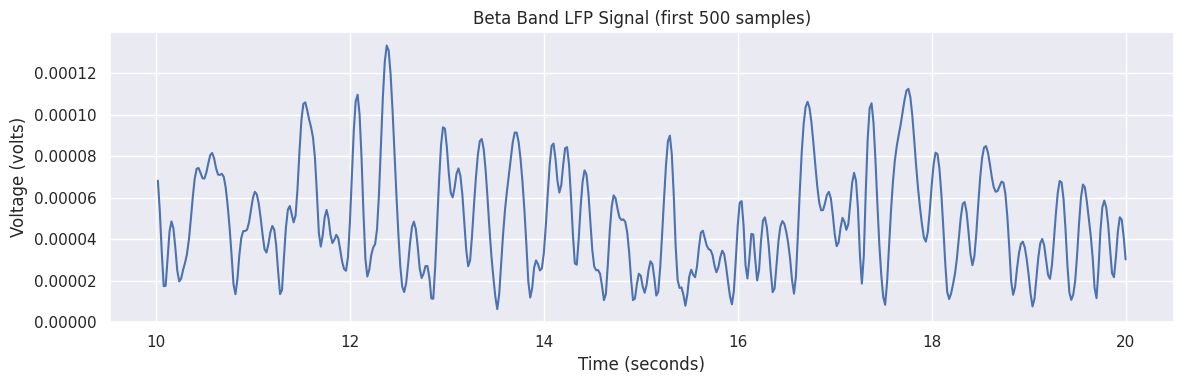

In [5]:
snippet_len = 500
timestamps = beta_band_voltage.timestamps[0:snippet_len]
data = beta_band_voltage.data[0:snippet_len]

plt.figure(figsize=(12, 4))
plt.plot(timestamps, data)
plt.xlabel("Time (seconds)")
plt.ylabel(f"Voltage ({beta_band_voltage.unit})")
plt.title("Beta Band LFP Signal (first 500 samples)")
plt.tight_layout()
plt.show()

## Electrode metadata
The dataset contains metadata about electrodes used in the simulation recorded in a electrodes table:

In [6]:
electrodes = nwbfile.electrodes
print("Columns in electrodes table:", electrodes.colnames)

# Display the first 5 rows of electrode metadata
from pandas import DataFrame
table_data = {col: electrodes[col].data[:5] for col in electrodes.colnames}
df = DataFrame(table_data)
df

Columns in electrodes table: ('location', 'group', 'group_name', 'label')


,location,group,group_name,label
0,Simulated Cortico-basal-ganglia network of brain,shank0 pynwb.ecephys.ElectrodeGroup at 0x13323...,shank0,shank0_elec0
1,Simulated Cortico-basal-ganglia network of brain,shank0 pynwb.ecephys.ElectrodeGroup at 0x13323...,shank0,shank0_elec1
2,Simulated Cortico-basal-ganglia network of brain,shank0 pynwb.ecephys.ElectrodeGroup at 0x13323...,shank0,shank0_elec2
3,Simulated Cortico-basal-ganglia network of brain,shank1 pynwb.ecephys.ElectrodeGroup at 0x13323...,shank1,shank1_elec0
4,Simulated Cortico-basal-ganglia network of brain,shank1 pynwb.ecephys.ElectrodeGroup at 0x13323...,shank1,shank1_elec1


## Summarize data & next steps
This notebook demonstrated how to:
- Access metadata and assets of DANDI:001333
- Load and explore an NWB file remotely
- Extract and visualize Beta band LFP signals
- Explore electrode metadata

For deeper insights, you can:
- Analyze more NWB files from this Dandiset
- Perform spectral analysis (PSD) or waveform averaging
- Integrate with behavioral data if available
- Apply relevant statistical techniques suited for neurophysiology data

**Remember:** This notebook serves as an initial exploration guide. For rigorous analysis, further validation and detailed domain-specific processing are needed.